In [83]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [84]:
PATH = "Weather_Data.csv"
dataset = pd.read_csv(PATH)

In [85]:
columns_to_drop = ["Date", "WindGustDir", "WindDir9am", "WindDir3pm", "Temp9am", "Temp3pm", "MinTemp", "MaxTemp", "WindSpeed9am", "WindSpeed3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm"]
dataset = dataset.drop(columns=columns_to_drop)

In [86]:
dataset['RainToday'].replace({'Yes': True, 'No': False}, inplace=True)

<Axes: >

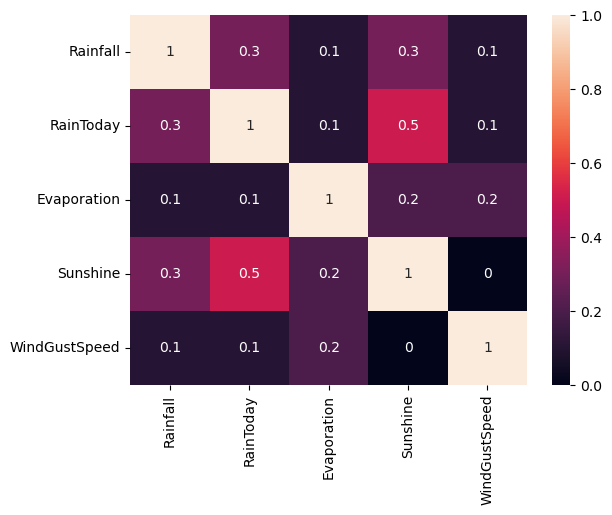

In [88]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [89]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop('RainToday', axis=1),
    dataset["RainToday"],
    test_size=0.2
)

In [90]:
model = GaussianNB()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)

print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.815267175572519
